# Analyse students' marks performance with Machine Learning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploring


In [3]:
# import data
students_data = pd.read_csv('data/final_project_data.csv')


In [4]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# check the shape of data
students_data.shape


(1000, 8)

In [6]:
# check if there is not any missing values
students_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# look at the short statistical description of quantitative data

students_data.describe().loc[:, 'math score':'writing score']


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Visualization


In [8]:
# changing names of columns to easiest way for further accessing

students_data.columns = students_data.columns.str.replace(' ', '_')

students_data.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [9]:
# add total_score column in dataframe
students_data['total_score'] = students_data.math_score + students_data.reading_score + students_data.writing_score

# look at the updated dataframe
students_data.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [10]:
# add column of gpa(mean of all scores) for each student
students_data['GPA'] = students_data.total_score/3
students_data.GPA = students_data.GPA.astype('int64')
students_data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [11]:
# create function for counting grades

def grades(gpa):
    if(gpa >= 90):
        return 'A'
    if(gpa >= 80):
        return 'B'
    if(gpa >= 70):
        return 'C'
    if(gpa >= 60):
        return 'D'
    if(gpa >= 40):
        return 'E'
    else :
        return 'F'

# add column grade in dataframe
students_data['grades'] = students_data.apply(lambda g: grades(g['GPA']), axis = 1)

In [12]:
students_data.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,GPA,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72,C
1,female,group C,some college,standard,completed,69,90,88,247,82,B
2,female,group B,master's degree,standard,none,90,95,93,278,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49,E
4,male,group C,some college,standard,none,76,78,75,229,76,C


In [13]:
students_data.isnull().sum()


gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
GPA                            0
grades                         0
dtype: int64

In [14]:
# check data types
students_data.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
total_score                     int64
GPA                             int64
grades                         object
dtype: object

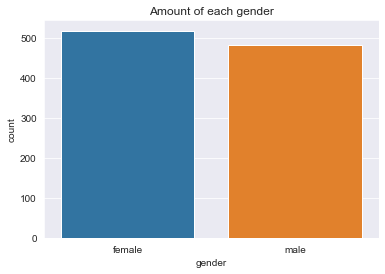

In [15]:
# Compare amount of each group of gender feature
sns.set_style('darkgrid')
sns.countplot(x=students_data.gender)
plt.title('Amount of each gender')
plt.show()

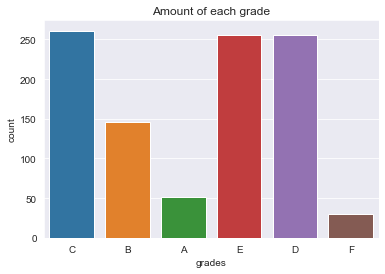

In [16]:
# Compare amount of each group of grades feature
sns.countplot(x=students_data.grades)
plt.title('Amount of each grade')
plt.show()

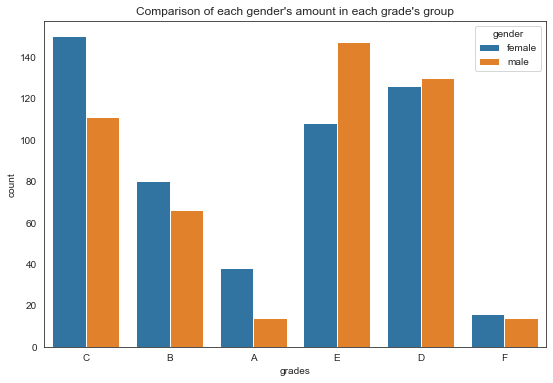

In [17]:
# show value counts for two categorical variables (gender, grades)

plt.figure(figsize=(9, 6))
sns.set_style('white')
sns.color_palette('gist_earth')
sns.countplot(x='grades', hue='gender', data=students_data)
plt.title("Comparison of each gender's amount in each grade's group")
plt.show()


Comparison in below table shows that those scores who chose standard lunch are higher than those who chose free/reduced type of lunch



In [18]:
# lets check effect of lunch on students performance by creating pivot table

students_data.pivot_table(index=['lunch','gender'],
                          values=['math_score', 'reading_score', 'writing_score', 'total_score'],
                          aggfunc='median')

math_score  reading_score  total_score  writing_score
lunch        gender                                                       
free/reduced female          57           67.0          193             68
             male            62           61.0          182             59
standard     female          67           75.0          219             76
             male            72           67.5          206             67

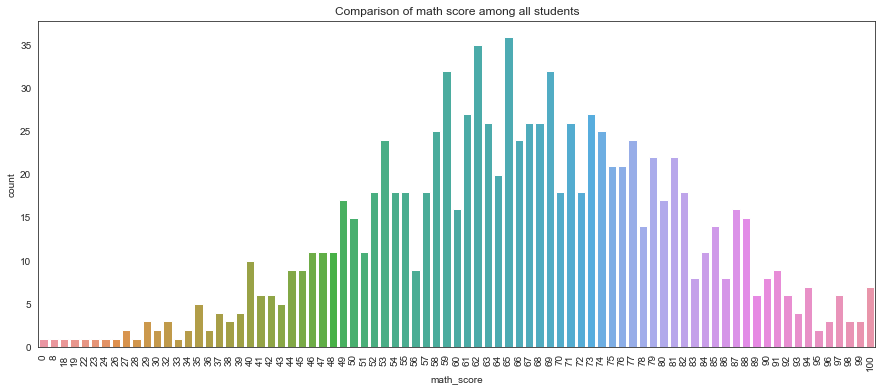

In [19]:
# lets plot the comparison of math score for all students

plt.figure(figsize=(15, 6))
sns.countplot(x=students_data.math_score)
plt.title('Comparison of math score among all students')
plt.xticks(rotation=90)
plt.show()

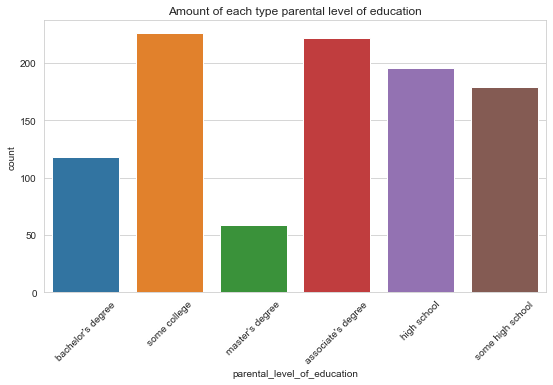

In [20]:
# visualize comparison of parental level of education

plt.figure(figsize=(9, 5))

sns.set_style('whitegrid')
sns.countplot(x=students_data.parental_level_of_education)
plt.title('Amount of each type parental level of education')
plt.xticks(rotation=45)
plt.show()


From below showed table we can see that female outnumber male in higher grates in most of degree groups

In [21]:
# check connections between parental level and total score among each grade group in pivot table

students_data.pivot_table(index='parental_level_of_education',
                          columns=['grades', 'gender'],
                          values='total_score',
                          aggfunc='median',
                          fill_value=0)


grades                           A             B             C             D  \
gender                      female   male female   male female   male female   
parental_level_of_education                                                    
associate's degree           276.0  278.0  259.5  245.0  226.5  225.0    198   
bachelor's degree            292.0  278.5  254.5  253.0  221.0  223.5    202   
high school                  284.5    0.0  248.0  247.5  224.0  217.0    197   
master's degree              284.5    0.0  259.0  259.0  225.0  231.0    190   
some college                 275.0  280.0  254.0  251.5  223.0  225.0    195   
some high school             281.5    0.0  251.0  247.5  224.5  226.0    198   

grades                                  E             F       
gender                        male female   male female male  
parental_level_of_education                                   
associate's degree           195.5  160.5  156.0     95  119  
bachelor's degree            195.5  168.0  155.5    117  119  
high school                  198.0  158.0  157.0    103   97  
master's degree              199.5  161.0  154.0      0    0  
some college                 191.0  168.0  154.5     94   90  
some high school             197.5  155.5  158.5     91  115

Here we can see that total scores among all students are mach higher in master's, bachelor's and associate's degrees than in others degrees

In [22]:
# check connections between parental level and  scores

students_data.pivot_table(index='parental_level_of_education',
                          columns='gender',
                          values=['math_score', 'writing_score', 'reading_score', 'total_score'],
                          aggfunc='median',
                          margins=True)

math_score             reading_score              \
gender                          female  male   All        female  male   All   
parental_level_of_education                                                    
associate's degree                65.0  72.0  67.0          75.5  68.0  72.5   
bachelor's degree                 67.0  70.0  68.0          76.0  67.0  73.0   
high school                       61.0  66.0  63.0          69.5  61.5  66.0   
master's degree                   64.5  79.0  73.0          74.0  77.0  76.0   
some college                      65.5  69.0  67.5          74.0  63.5  70.5   
some high school                  63.0  68.0  65.0          71.0  66.0  67.0   
All                               65.0  69.0  66.0          73.0  66.0  70.0   

                            total_score               writing_score        \
gender                           female   male    All        female  male   
parental_level_of_education                                                 
associate's degree                214.0  206.5  209.0          74.0  65.5   
bachelor's degree                 221.0  204.0  213.5          80.0  68.0   
high school                       198.0  187.5  195.0          68.0  58.5   
master's degree                   213.5  231.0  220.0          76.5  74.0   
some college                      216.0  195.5  206.0          74.5  62.5   
some high school                  206.0  196.5  200.0          72.0  61.5   
All                               211.0  199.0  205.0          74.0  64.0   

                                   
gender                        All  
parental_level_of_education        
associate's degree           70.5  
bachelor's degree            74.0  
high school                  64.0  
master's degree              75.0  
some college                 70.0  
some high school             66.0  
All                          69.0

In [23]:
# adding status column for total status level

students_data['total_status'] = np.where(students_data.grades=='F', 'fail', 'passed')

From next two tables it is obvious that male are stronger in math than female, and female outnumber male in writing and reading. And among all students percentage of course compilation is 97%.


In [24]:
students_data.groupby(['test_preparation_course','gender']).agg('median')

math_score  reading_score  writing_score  \
test_preparation_course gender                                             
completed               female        67.0           78.0           79.0   
                        male          73.0           71.0           70.0   
none                    female        62.0           71.0           70.0   
                        male          67.0           63.0           60.0   

                                total_score   GPA  
test_preparation_course gender                     
completed               female        224.0  74.0  
                        male          213.0  71.0  
none                    female        202.5  67.0  
                        male          189.0  63.0

In [25]:
# check connections between parental level and status of passing among all students

students_data.pivot_table(index='parental_level_of_education',
                          columns='total_status',
                          values='gender',
                          aggfunc='count',
                          margins=True,
                          fill_value=0)

total_status,fail,passed,All
parental_level_of_education,,,
associate's degree,2,220,222
bachelor's degree,2,116,118
high school,10,186,196
master's degree,0,59,59
some college,6,220,226
some high school,10,169,179
All,30,970,1000


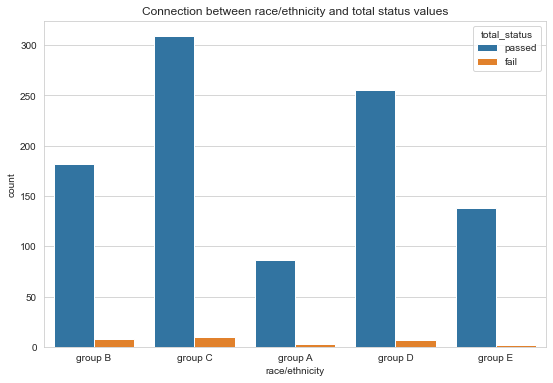

In [26]:
# one more final visualization for checking if race/ethnicity is connected with total status level in some case or not

plt.figure(figsize=(9, 6))
sns.countplot(x='race/ethnicity', hue='total_status', data=students_data)
plt.title('Connection between race/ethnicity and total status values')
plt.show()


# Preprocessing and Model building

In [27]:
# checking our final data

students_data.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,GPA,grades,total_status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72,C,passed
1,female,group C,some college,standard,completed,69,90,88,247,82,B,passed
2,female,group B,master's degree,standard,none,90,95,93,278,92,A,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49,E,passed
4,male,group C,some college,standard,none,76,78,75,229,76,C,passed


In [28]:
# shape of data

students_data.shape

(1000, 12)

In [29]:
# check missing values

students_data.isnull().sum()


gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
GPA                            0
grades                         0
total_status                   0
dtype: int64

In [30]:
# check amount of unique items of each qualitative data
students_data.select_dtypes(exclude='number').nunique()


gender                         2
race/ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
grades                         6
total_status                   2
dtype: int64

# Importing necessary libraries

In [31]:
# preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# model selections
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Prepare data

In [32]:
# from independent variables we will drop the 'grades' column, which is our dependent variable,
# also we will drop 'total_status' column, which is based on 'grades' column, they both based on same logic

X = students_data.drop(['total_status', 'grades'], axis='columns')
y = students_data.grades

In [33]:
print(f'Shape of X --> {X.shape}')
print(f'Shape of y --> {y.shape}')


Shape of X --> (1000, 10)
Shape of y --> (1000,)


In [34]:
# split data into train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# because we have different features which needs different preprocessing, we will use the folowing

transformed = make_column_transformer(
    (OneHotEncoder(), ['gender', 'race/ethnicity',
                       'parental_level_of_education', 'lunch',
                       'test_preparation_course']),
    remainder='passthrough'
)

In [36]:
# separately encode data for further modeling without pipeline technique

# encoding independent variables
X_ttrain = transformed.fit_transform(X_train)
X_ttest = transformed.fit_transform(X_test)

# encode only one column- dependent variable:
lb_encoder = LabelEncoder()
y_ttrain = lb_encoder.fit_transform(y_train)
y_ttest = lb_encoder.fit_transform(y_test)

# scale data
scale = StandardScaler()
X_ttrain = scale.fit_transform(X_ttrain)
X_ttest = scale.fit_transform(X_ttest)

# Make Pipeline

In [37]:
# implement make_pipeline for using transformation, scaling, classification models and cross validating as a chane in one pipline

lr = LogisticRegression(max_iter=10000, C=10, solver='saga')
svc = SVC(kernel='linear', C=10)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

for clf in [svc, rf, knn, lr]:
    pipe = make_pipeline(transformed, StandardScaler(), clf)
    cross_score = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()

    # fit models and check training/accuracy scores for each one
    pipe.fit(X_train, y_train)
    pipe_pred = pipe.predict(X_test)
    pipe_accuracy = accuracy_score(y_test, pipe_pred)

    print(f"{clf.__class__.__name__} cross_val_score --> {cross_score}")
    print(f"{clf.__class__.__name__} accuracy score --> {pipe_accuracy}")
    print(f"{clf.__class__.__name__} training score --> {pipe.score(X_train, y_train)}\n")

SVC cross_val_score --> 0.9642857142857142
SVC accuracy score --> 0.9566666666666667
SVC training score --> 0.9985714285714286

RandomForestClassifier cross_val_score --> 0.9971428571428571
RandomForestClassifier accuracy score --> 0.9966666666666667
RandomForestClassifier training score --> 1.0

KNeighborsClassifier cross_val_score --> 0.5757142857142858
KNeighborsClassifier accuracy score --> 0.5833333333333334
KNeighborsClassifier training score --> 0.7428571428571429

LogisticRegression cross_val_score --> 0.9414285714285715
LogisticRegression accuracy score --> 0.94
LogisticRegression training score --> 0.9957142857142857



# Voting technique


In [38]:
# implement Voting soft method with Classifiers (with scaled data)
# We will predict the class with the highest class probability, averaged over all the individual classifiers(voting='soft')

lr_clf = LogisticRegression(max_iter=10000, C=10)
svm_clf = SVC(probability=True, kernel='linear', C=10)
sgd_clf = SGDClassifier(loss='modified_huber', average=True, alpha=0.01)
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier( metric='manhattan')

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('svc', svm_clf), ('sgd', sgd_clf), ('rf', rf_clf), ('knn', knn_clf)],
    voting='soft')


for clf in [lr_clf, svm_clf, sgd_clf, rf_clf, knn_clf, voting_clf]:
    clf.fit(X_ttrain, y_ttrain)
    y_pred = clf.predict(X_ttest)
    each_accuracy = accuracy_score(y_ttest, y_pred)
    train_score = clf.score(X_ttrain, y_ttrain)
    print(clf.__class__.__name__, "training score -->", train_score)
    print(clf.__class__.__name__, "accuracy score -->", each_accuracy, '\n')

LogisticRegression training score --> 0.9957142857142857
LogisticRegression accuracy score --> 0.8466666666666667 

SVC training score --> 0.9985714285714286
SVC accuracy score --> 0.86 

SGDClassifier training score --> 0.7585714285714286
SGDClassifier accuracy score --> 0.6933333333333334 

RandomForestClassifier training score --> 1.0
RandomForestClassifier accuracy score --> 0.85 

KNeighborsClassifier training score --> 0.8342857142857143
KNeighborsClassifier accuracy score --> 0.6733333333333333 

VotingClassifier training score --> 0.9914285714285714
VotingClassifier accuracy score --> 0.8566666666666667 



# Bagging method

Bagging accuracy score:   0.85
training score:  1.0


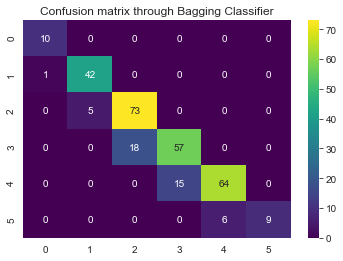

In [39]:
"""
for the end lets try also Bagging/Bootstrap Aggregating method. (with scaled data)

We will use the same training algorithm for every predictor and train them on different
random subsets of the training set with sampling replacement(bootstrap=True).
The remaining part of the training instances that are not sampled(oob instances) also can be
evaluated by ensemble through averaging evaluations of each predictor(oob_score=True).
"""

bg_clf = BaggingClassifier(
    RandomForestClassifier(random_state=42),
    n_estimators=500, bootstrap=True, oob_score=True)
bg_clf.fit(X_ttrain, y_ttrain)
bg_pred = bg_clf.predict(X_ttest)
bg_accuracy_score = accuracy_score(y_ttest, bg_pred)
print('Bagging accuracy score:  ', bg_accuracy_score)
print('training score: ', bg_clf.score(X_ttrain, y_ttrain))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_ttest, bg_pred), annot=True, cmap='viridis')
plt.title('Confusion matrix through Bagging Classifier')
plt.show()

# chose the best model

As we can see from above used techniques and models, best accuracies have RandomForestClassifier and SVC using pipline.
Now lets try this two algorithms separately with pipeline

accuracy score:  0.9566666666666667
training score:  0.9985714285714286 


Classification report: 
               precision    recall  f1-score   support

           A       0.91      1.00      0.95        10
           B       0.98      0.98      0.98        43
           C       1.00      0.97      0.99        78
           D       0.94      0.97      0.95        75
           E       0.95      0.92      0.94        79
           F       0.87      0.87      0.87        15

    accuracy                           0.96       300
   macro avg       0.94      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300


Confusion matrix: 
 [[10  0  0  0  0  0]
 [ 1 42  0  0  0  0]
 [ 0  1 76  1  0  0]
 [ 0  0  0 73  2  0]
 [ 0  0  0  4 73  2]
 [ 0  0  0  0  2 13]]


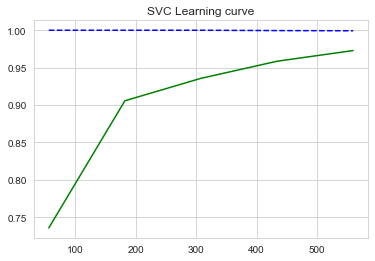

In [40]:
# Make predictions and visualization with SMV Classifier (with scaled data)

svc_pipe = make_pipeline(transformed, StandardScaler(), SVC(kernel='linear', C=10))
svc_pipe.fit(X_train, y_train)
svc_pipe_pred = svc_pipe.predict(X_test)
svc_pipe_accuracy = accuracy_score(y_test, svc_pipe_pred)

print('accuracy score: ', svc_pipe_accuracy)
print('training score: ', svc_pipe.score(X_train, y_train), '\n')

# plot SVC training and test set curves
sizes, training_scores, testing_scores = learning_curve(svc_pipe, X_train, y_train)
train_scores_mean = np.mean(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)

plt.plot(sizes, train_scores_mean, '--', color="b")
plt.plot(sizes, test_scores_mean, color="g")
plt.title('SVC Learning curve')
plt.show()

# Checking performance  with classification report.
print('\nClassification report: \n', classification_report(y_test, svc_pipe_pred))
print('\nConfusion matrix: \n', confusion_matrix(y_test, svc_pipe_pred))


accuracy score:  1.0
training score:  1.0 


Classification report: 
               precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        43
           C       1.00      1.00      1.00        78
           D       1.00      1.00      1.00        75
           E       1.00      1.00      1.00        79
           F       1.00      1.00      1.00        15

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Confusion matrix: 
 [[10  0  0  0  0  0]
 [ 0 43  0  0  0  0]
 [ 0  0 78  0  0  0]
 [ 0  0  0 75  0  0]
 [ 0  0  0  0 79  0]
 [ 0  0  0  0  0 15]]


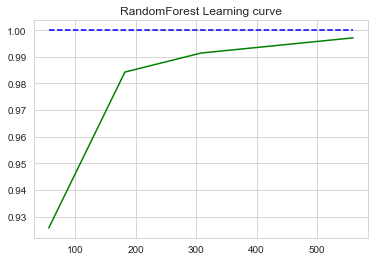

In [44]:
# Make predictions and visualization with RandomForest Classifier (with scaled data)

rf_pipe = make_pipeline(transformed, StandardScaler(), RandomForestClassifier())
rf_pipe.fit(X_train, y_train)
rf_pipe_pred = rf_pipe.predict(X_test)
rf_pipe_accuracy = accuracy_score(y_test, rf_pipe_pred)

print('accuracy score: ', rf_pipe_accuracy)
print('training score: ', rf_pipe.score(X_train, y_train), '\n')

# plot training and test sets
sizes, training_scores, testing_scores = learning_curve(rf_pipe, X_train, y_train)
train_scores_mean = np.mean(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)

plt.plot(sizes, train_scores_mean, '--', color="b")
plt.plot(sizes, test_scores_mean, color="g")
plt.title('RandomForest Learning curve')
plt.show()

# Checking performance of model  with classification report.
print('\nClassification report: \n', classification_report(y_test, rf_pipe_pred))
print('\nConfusion matrix: \n', confusion_matrix(y_test, rf_pipe_pred))

